<Figure size 432x288 with 0 Axes>

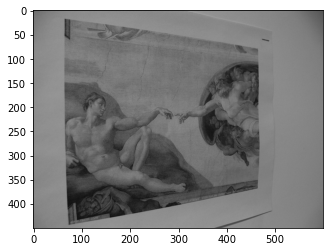

<Figure size 432x288 with 0 Axes>

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import pymagsac
from time import time
from copy import deepcopy 

img = cv2.cvtColor(cv2.imread('../graph-cut-ransac/build/data/adam/adam1.png'), cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.figure()

<Figure size 432x288 with 0 Axes>

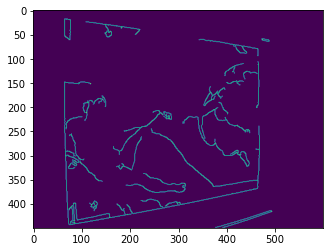

<Figure size 432x288 with 0 Axes>

In [7]:
# Assuming img is your image
# Convert the image to grayscale
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply Gaussian blur to the grayscale image
img_blur = cv2.GaussianBlur(img_gray, (5, 5), 0)

# Apply Canny edge detection
edges = cv2.Canny(img_blur, 50, 150)

# Display the image
plt.imshow(edges)
plt.figure()

In [8]:
# Get the indices of edge points
edge_points_original = np.argwhere(edges == 255)
edge_points = edge_points_original[:, ::-1]  # Swap columns

print(f"{len(edge_points)} points found.")

4855 points found.


In [9]:
def draw_edges_and_line(img, edge_points, line):
    # Draw the edge points on the image
    for point in edge_points:
        cv2.circle(img, tuple(point[::-1]), radius=2, color=(255, 0, 0), thickness=-1)

    # Convert the implicit line equation to two endpoints of a line segment
    a, b, c = line
    y1 = 0
    x1 = int(-c/a) if a!=0 else 0
    y2 = img.shape[0] - 1
    x2 = int(-(b*y2 + c)/a) if a!=0 else 0

    # Draw the line on the image
    cv2.line(img, (x1, y1), (x2, y2), (0, 255, 0), thickness=2)

    # Display the image
    plt.imshow(img)
    plt.figure()

Note that the inlier number does not determine the quality of the solution since MAGSAC and MAGSAC++ does not return inliers. The ones shown are selected by using a dummy threshold.
327.0 inliers found
0.07251453399658203  sec magsac++
326.0 inliers found
0.07147717475891113  sec magsac


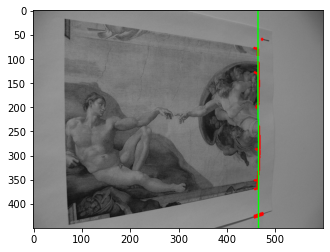

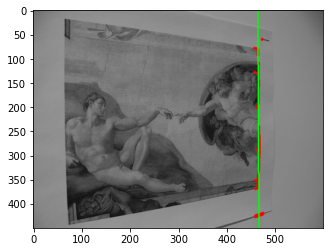

<Figure size 432x288 with 0 Axes>

In [10]:
def verify_pymagsac(points, use_magsac_plus_plus, h, w, sampler_id):
    line, mask = pymagsac.findLine2D(
        np.ascontiguousarray(points), 
        w, h,
        probabilities = [],
        sampler = sampler_id,
        use_magsac_plus_plus = use_magsac_plus_plus,
        sigma_th = 3.0)
    print (deepcopy(mask).astype(np.float32).sum(), 'inliers found')
    return line, mask

print("Note that the inlier number does not determine the quality of the solution since MAGSAC and MAGSAC++ does not return inliers. The ones shown are selected by using a dummy threshold.")

t = time()
magpp_line, magpp_mask = verify_pymagsac(edge_points, True, img.shape[0], img.shape[1], 0)
print (time()-t, ' sec magsac++')

draw_edges_and_line(deepcopy(img), edge_points_original[magpp_mask], magpp_line)

t = time()
mag_line, mag_mask = verify_pymagsac(edge_points, False, img.shape[0], img.shape[1], 0)
print (time()-t, ' sec magsac')

draw_edges_and_line(deepcopy(img), edge_points_original[mag_mask], mag_line)

